# Table of Contents

#  Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Facebook Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

/home/zenanahmed/.pyenv/versions/3.8.12/envs/Team_Energy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


# Installations

In [2]:
#!pip install prophet

# Import Data

In [3]:
#wd=pd.read_csv('https://storage.googleapis.com/weather-data-processed-for-le-wagon/cleaned_weather_hourly_darksky.csv')

df=pd.read_csv('https://storage.googleapis.com/energy_consumption_903/df_all_avg_v1.csv')

In [4]:
df

,DateTime,KWH/hh,Acorn_Group
0,2012-01-01 00:00:00,0.520000,A
1,2012-01-01 00:30:00,0.449500,A
2,2012-01-01 01:00:00,0.392500,A
3,2012-01-01 01:30:00,0.451000,A
4,2012-01-01 02:00:00,0.842000,A
...,...,...,...
588013,2014-02-27 22:00:00,0.243118,Q
588014,2014-02-27 22:30:00,0.306706,Q
588015,2014-02-27 23:00:00,0.283118,Q
588016,2014-02-27 23:30:00,0.195118,Q


# Exploratory Data Analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588018 entries, 0 to 588017
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DateTime     588018 non-null  object 
 1   KWH/hh       588018 non-null  float64
 2   Acorn_Group  588018 non-null  object 
dtypes: float64(1), object(2)
memory usage: 13.5+ MB


In [7]:
df['DateTime'] = pd.DatetimeIndex(df['DateTime'])

In [8]:
df.dtypes

DateTime       datetime64[ns]
KWH/hh                float64
Acorn_Group            object
dtype: object

In [9]:
df2=df.groupby(by=["Acorn_Group",df.DateTime]).mean()

In [10]:
df2

KWH/hh
Acorn_Group DateTime                     
A           2012-01-01 00:00:00  0.520000
            2012-01-01 00:30:00  0.449500
            2012-01-01 01:00:00  0.392500
            2012-01-01 01:30:00  0.451000
            2012-01-01 02:00:00  0.842000
...                                   ...
Q           2014-02-27 22:00:00  0.243118
            2014-02-27 22:30:00  0.306706
            2014-02-27 23:00:00  0.283118
            2014-02-27 23:30:00  0.195118
            2014-02-28 00:00:00  0.219294

[588018 rows x 1 columns]

In [13]:
df2.groupby(level='Acorn_Group').transform('max')

KWH/hh
Acorn_Group DateTime                     
A           2012-01-01 00:00:00  1.764750
            2012-01-01 00:30:00  1.764750
            2012-01-01 01:00:00  1.764750
            2012-01-01 01:30:00  1.764750
            2012-01-01 02:00:00  1.764750
...                                   ...
Q           2014-02-27 22:00:00  0.839455
            2014-02-27 22:30:00  0.839455
            2014-02-27 23:00:00  0.839455
            2014-02-27 23:30:00  0.839455
            2014-02-28 00:00:00  0.839455

[588018 rows x 1 columns]

In [14]:
df2.unstack(level=0)

KWH/hh                                                \
Acorn_Group                A      B         C        D         F         G   
DateTime                                                                     
2012-01-01 00:00:00  0.52000    NaN  0.237500  0.22275  0.199833  0.139333   
2012-01-01 00:30:00  0.44950    NaN  0.323500  0.29100  0.166083  0.130000   
2012-01-01 01:00:00  0.39250    NaN  0.400000  0.26100  0.150417  0.129000   
2012-01-01 01:30:00  0.45100    NaN  0.382500  0.29875  0.164250  0.118333   
2012-01-01 02:00:00  0.84200    NaN  0.227500  0.41300  0.140000  0.110000   
...                      ...    ...       ...      ...       ...       ...   
2014-02-27 22:00:00  0.78975  0.282  0.620000  0.62700  0.317231  0.174400   
2014-02-27 22:30:00  0.64575  0.261  0.592667  0.66320  0.320538  0.190800   
2014-02-27 23:00:00  0.51875  0.256  0.440667  0.45760  0.269538  0.159400   
2014-02-27 23:30:00  0.35250  0.287  0.562333  0.54040  0.210077  0.167600   
2014-02-28 00:00:00  0.19400  0.338  0.475333  0.52240  0.183308  0.124800   

                                                                            \
Acorn_Group                 H       I         J        K         L       M   
DateTime                                                                     
2012-01-01 00:00:00  0.207000     NaN  0.117667  0.09400  0.303800  0.4505   
2012-01-01 00:30:00  0.265667     NaN  0.107333  0.04550  0.329800  0.4825   
2012-01-01 01:00:00  0.239000     NaN  0.102333  0.04050  0.240400  0.4500   
2012-01-01 01:30:00  0.180000     NaN  0.108000  0.04800  0.287400  0.4145   
2012-01-01 02:00:00  0.125000     NaN  0.137000  0.05650  0.236400  0.2675   
...                       ...     ...       ...      ...       ...     ...   
2014-02-27 22:00:00  0.380200  0.1140  0.187500  0.18375  0.477500  0.3910   
2014-02-27 22:30:00  0.390900  0.1030  0.175000  0.15275  0.505625  0.3980   
2014-02-27 23:00:00  0.316300  0.0810  0.095500  0.17100  0.304750  0.3250   
2014-02-27 23:30:00  0.290800  0.0855  0.133000  0.13500  0.270625  0.0920   
2014-02-28 00:00:00  0.145400  0.0705  0.130000  0.10250  0.137375  0.0910   

                                                             
Acorn_Group                 N         O         P         Q  
DateTime                                                     
2012-01-01 00:00:00       NaN  0.088500       NaN  0.197727  
2012-01-01 00:30:00       NaN  0.076000       NaN  0.321364  
2012-01-01 01:00:00       NaN  0.061500       NaN  0.295000  
2012-01-01 01:30:00       NaN  0.046500       NaN  0.172273  
2012-01-01 02:00:00       NaN  0.051000       NaN  0.131727  
...                       ...       ...       ...       ...  
2014-02-27 22:00:00  0.219000  0.253667  0.242667  0.243118  
2014-02-27 22:30:00  0.206000  0.239000  0.219667  0.306706  
2014-02-27 23:00:00  0.192667  0.254667  0.181667  0.283118  
2014-02-27 23:30:00  0.185000  0.107000  0.172667  0.195118  
2014-02-28 00:00:00  0.130333  0.078667  0.141333  0.219294  

[37873 rows x 16 columns]

In [15]:
df3=df2.unstack(level=0).dropna()

In [16]:
df3

KWH/hh                                               \
Acorn_Group                 A      B         C         D         F       G   
DateTime                                                                     
2012-05-18 07:30:00  0.253333  0.138  0.297250  0.358571  0.207643  0.1316   
2012-05-18 08:00:00  0.183333  0.138  0.355250  0.320571  0.150143  0.1950   
2012-05-18 09:00:00  0.088000  0.138  0.177500  0.503714  0.104357  0.1766   
2012-05-18 09:30:00  0.169667  0.144  0.124250  0.596000  0.187429  0.1534   
2012-05-18 10:00:00  0.128000  0.145  0.137000  0.547857  0.185357  0.1442   
...                       ...    ...       ...       ...       ...     ...   
2014-02-27 22:00:00  0.789750  0.282  0.620000  0.627000  0.317231  0.1744   
2014-02-27 22:30:00  0.645750  0.261  0.592667  0.663200  0.320538  0.1908   
2014-02-27 23:00:00  0.518750  0.256  0.440667  0.457600  0.269538  0.1594   
2014-02-27 23:30:00  0.352500  0.287  0.562333  0.540400  0.210077  0.1676   
2014-02-28 00:00:00  0.194000  0.338  0.475333  0.522400  0.183308  0.1248   

                                                                            \
Acorn_Group                 H       I         J        K         L       M   
DateTime                                                                     
2012-05-18 07:30:00  0.194857  0.1450  0.194333  0.11450  0.262000  0.5580   
2012-05-18 08:00:00  0.231571  0.1670  0.148667  0.06850  0.265167  0.3145   
2012-05-18 09:00:00  0.160714  0.0790  0.126333  0.09200  0.284000  0.1810   
2012-05-18 09:30:00  0.147286  0.0690  0.114333  0.06700  0.140667  0.1985   
2012-05-18 10:00:00  0.202857  0.0850  0.137667  0.06650  0.175833  0.1975   
...                       ...     ...       ...      ...       ...     ...   
2014-02-27 22:00:00  0.380200  0.1140  0.187500  0.18375  0.477500  0.3910   
2014-02-27 22:30:00  0.390900  0.1030  0.175000  0.15275  0.505625  0.3980   
2014-02-27 23:00:00  0.316300  0.0810  0.095500  0.17100  0.304750  0.3250   
2014-02-27 23:30:00  0.290800  0.0855  0.133000  0.13500  0.270625  0.0920   
2014-02-28 00:00:00  0.145400  0.0705  0.130000  0.10250  0.137375  0.0910   

                                                             
Acorn_Group                 N         O         P         Q  
DateTime                                                     
2012-05-18 07:30:00  0.115333  0.099500  0.279333  0.196706  
2012-05-18 08:00:00  0.098333  0.102000  0.166000  0.175176  
2012-05-18 09:00:00  0.093333  0.063000  0.320667  0.191588  
2012-05-18 09:30:00  0.064000  0.060000  0.352667  0.147706  
2012-05-18 10:00:00  0.052667  0.070000  0.309000  0.173412  
...                       ...       ...       ...       ...  
2014-02-27 22:00:00  0.219000  0.253667  0.242667  0.243118  
2014-02-27 22:30:00  0.206000  0.239000  0.219667  0.306706  
2014-02-27 23:00:00  0.192667  0.254667  0.181667  0.283118  
2014-02-27 23:30:00  0.185000  0.107000  0.172667  0.195118  
2014-02-28 00:00:00  0.130333  0.078667  0.141333  0.219294  

[31229 rows x 16 columns]

In [17]:
df3['KWH/hh'][['A']]

Acorn_Group,A
DateTime,
2012-05-18 07:30:00,0.253333
2012-05-18 08:00:00,0.183333
2012-05-18 09:00:00,0.088000
2012-05-18 09:30:00,0.169667
2012-05-18 10:00:00,0.128000
...,...
2014-02-27 22:00:00,0.789750
2014-02-27 22:30:00,0.645750
2014-02-27 23:00:00,0.518750


Text(0, 0.5, 'Energy(kW/HH)')

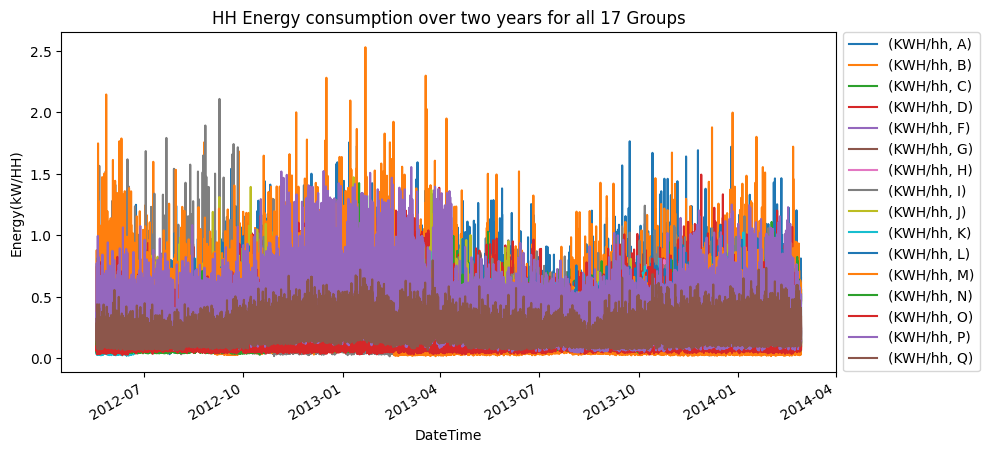

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
df3.plot(ax=ax)

plt.title('HH Energy consumption over two years for all 17 Groups', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Energy(kW/HH)")

<AxesSubplot:xlabel='DateTime'>

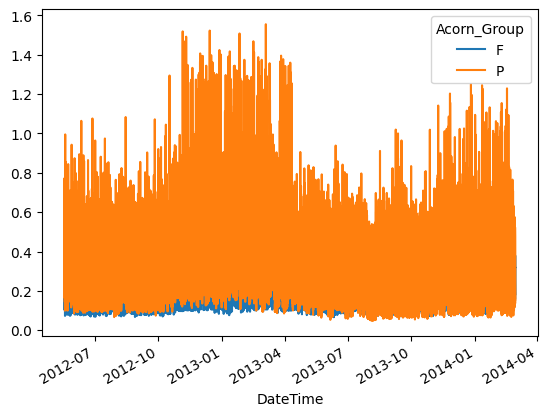

In [22]:
df3['KWH/hh'][['F','P']].plot()

In [23]:
df4=df3.copy()
df4.describe()['KWH/hh']['A']

count    31229.000000
mean         0.313937
std          0.225469
min          0.034500
25%          0.141000
50%          0.250333
75%          0.413000
max          1.764750
Name: A, dtype: float64

In [24]:
mean_groups=pd.DataFrame(df4.describe().iloc[1,:].unstack(level=0))
mean_groups=mean_groups.reset_index()
mean_groups

,Acorn_Group,KWH/hh
0,A,0.313937
1,B,0.209477
2,C,0.287388
3,D,0.333639
4,F,0.203338
5,G,0.186482
6,H,0.251232
7,I,0.162108
8,J,0.193680
9,K,0.156186


<AxesSubplot:xlabel='Acorn_Group', ylabel='KWH/hh'>

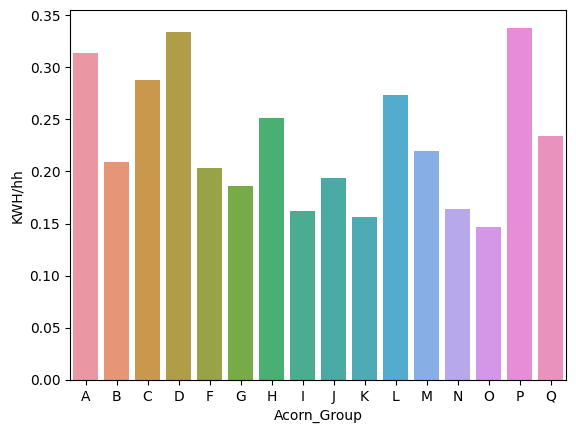

In [25]:
sns.barplot(x=mean_groups['Acorn_Group'],y=mean_groups['KWH/hh'])

In [27]:
df.index = df['DateTime']
df.drop(columns='DateTime')
dfgrouped=df.groupby(by=[df.index.day,df.index.month,'Acorn_Group']).mean()

In [28]:
dfgrouped

KWH/hh
DateTime DateTime Acorn_Group          
1        1        A            0.441330
                  B            0.282552
                  C            0.385170
                  D            0.394303
                  F            0.217371
...                                 ...
31       12       M            0.290108
                  N            0.216833
                  O            0.169580
                  P            0.314517
                  Q            0.267733

[5853 rows x 1 columns]

# Preprocessing Data

In [29]:
df

,DateTime,KWH/hh,Acorn_Group
DateTime,,,
2012-01-01 00:00:00,2012-01-01 00:00:00,0.520000,A
2012-01-01 00:30:00,2012-01-01 00:30:00,0.449500,A
2012-01-01 01:00:00,2012-01-01 01:00:00,0.392500,A
2012-01-01 01:30:00,2012-01-01 01:30:00,0.451000,A
2012-01-01 02:00:00,2012-01-01 02:00:00,0.842000,A
...,...,...,...
2014-02-27 22:00:00,2014-02-27 22:00:00,0.243118,Q
2014-02-27 22:30:00,2014-02-27 22:30:00,0.306706,Q
2014-02-27 23:00:00,2014-02-27 23:00:00,0.283118,Q


In [30]:
print(df.index.hour.unique())
print(df.index.minute.unique())

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='DateTime')
Int64Index([0, 30], dtype='int64', name='DateTime')


In [31]:
df5=df.loc[:,['Acorn_Group','KWH/hh']]

In [32]:
data_gla=df5.groupby(by=df5.index).mean()
data_gla

,KWH/hh
DateTime,
2012-01-01 00:00:00,0.231551
2012-01-01 00:30:00,0.249021
2012-01-01 01:00:00,0.230137
2012-01-01 01:30:00,0.222626
2012-01-01 02:00:00,0.228136
...,...
2014-02-27 22:00:00,0.343924
2014-02-27 22:30:00,0.335663
2014-02-27 23:00:00,0.269226


In [33]:
data_gla=data_gla.reset_index()
data_gla

,DateTime,KWH/hh
0,2012-01-01 00:00:00,0.231551
1,2012-01-01 00:30:00,0.249021
2,2012-01-01 01:00:00,0.230137
3,2012-01-01 01:30:00,0.222626
4,2012-01-01 02:00:00,0.228136
...,...,...
37868,2014-02-27 22:00:00,0.343924
37869,2014-02-27 22:30:00,0.335663
37870,2014-02-27 23:00:00,0.269226
37871,2014-02-27 23:30:00,0.236664


In [34]:
data_gla.rename(columns={"DateTime": "ds", "KWH/hh": "y"},inplace=True)
data_gla

,ds,y
0,2012-01-01 00:00:00,0.231551
1,2012-01-01 00:30:00,0.249021
2,2012-01-01 01:00:00,0.230137
3,2012-01-01 01:30:00,0.222626
4,2012-01-01 02:00:00,0.228136
...,...,...
37868,2014-02-27 22:00:00,0.343924
37869,2014-02-27 22:30:00,0.335663
37870,2014-02-27 23:00:00,0.269226
37871,2014-02-27 23:30:00,0.236664


# Train Model

In [35]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_gla)

16:16:47 - cmdstanpy - INFO - Chain [1] start processing
16:16:53 - cmdstanpy - INFO - Chain [1] done processing


# Forecast

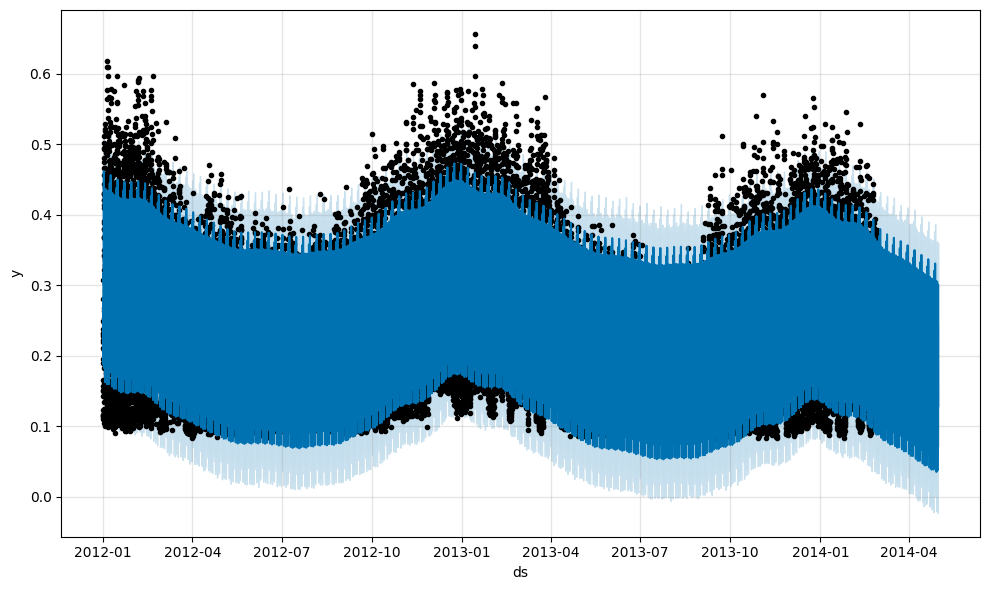

In [36]:
future = m.make_future_dataframe(periods=1488, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

<AxesSubplot:xlabel='ds', ylabel='yhat'>

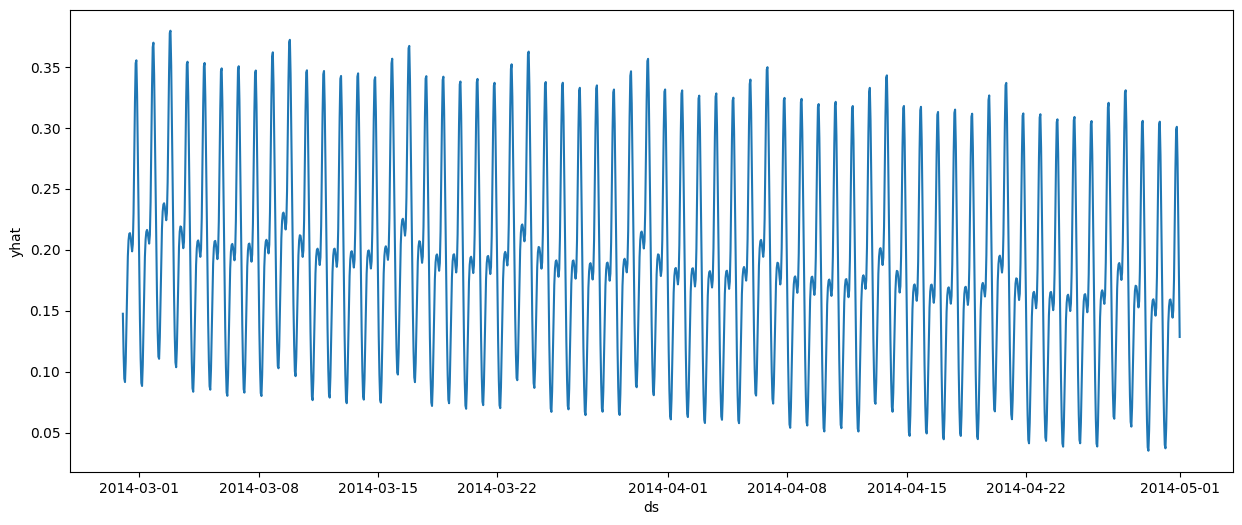

In [47]:
forecast=fcst.loc[fcst['ds']>'2014-02-28 00:00:00',['ds','yhat']]
figure(figsize=(15,6))
sns.lineplot(x=forecast['ds'],y=forecast['yhat'])

In [48]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01 00:00:00,0.230507,0.227071,0.336059,0.230507,0.230507,0.050465,0.050465,0.050465,-0.025635,...,0.013355,0.013355,0.013355,0.062746,0.062746,0.062746,0.0,0.0,0.0,0.280973
1,2012-01-01 00:30:00,0.230508,0.205663,0.317281,0.230508,0.230508,0.030049,0.030049,0.030049,-0.046605,...,0.013919,0.013919,0.013919,0.062735,0.062735,0.062735,0.0,0.0,0.0,0.260557
2,2012-01-01 01:00:00,0.230509,0.186250,0.296295,0.230509,0.230509,0.011323,0.011323,0.011323,-0.065874,...,0.014473,0.014473,0.014473,0.062723,0.062723,0.062723,0.0,0.0,0.0,0.241832
3,2012-01-01 01:30:00,0.230510,0.169345,0.278069,0.230510,0.230510,-0.005546,-0.005546,-0.005546,-0.083273,...,0.015015,0.015015,0.015015,0.062712,0.062712,0.062712,0.0,0.0,0.0,0.224964
4,2012-01-01 02:00:00,0.230511,0.155102,0.265534,0.230511,0.230511,-0.020144,-0.020144,-0.020144,-0.098389,...,0.015544,0.015544,0.015544,0.062701,0.062701,0.062701,0.0,0.0,0.0,0.210367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39356,2014-04-30 20:00:00,0.184711,0.244147,0.359747,0.183957,0.185442,0.116055,0.116055,0.116055,0.146159,...,-0.007575,-0.007575,-0.007575,-0.022529,-0.022529,-0.022529,0.0,0.0,0.0,0.300766
39357,2014-04-30 21:00:00,0.184705,0.215644,0.327946,0.183950,0.185436,0.088240,0.088240,0.088240,0.118530,...,-0.007730,-0.007730,-0.007730,-0.022560,-0.022560,-0.022560,0.0,0.0,0.0,0.272944
39358,2014-04-30 22:00:00,0.184698,0.170955,0.282015,0.183944,0.185431,0.041702,0.041702,0.041702,0.072151,...,-0.007858,-0.007858,-0.007858,-0.022590,-0.022590,-0.022590,0.0,0.0,0.0,0.226401
39359,2014-04-30 23:00:00,0.184692,0.121492,0.232225,0.183937,0.185425,-0.009399,-0.009399,-0.009399,0.021179,...,-0.007957,-0.007957,-0.007957,-0.022621,-0.022621,-0.022621,0.0,0.0,0.0,0.175293


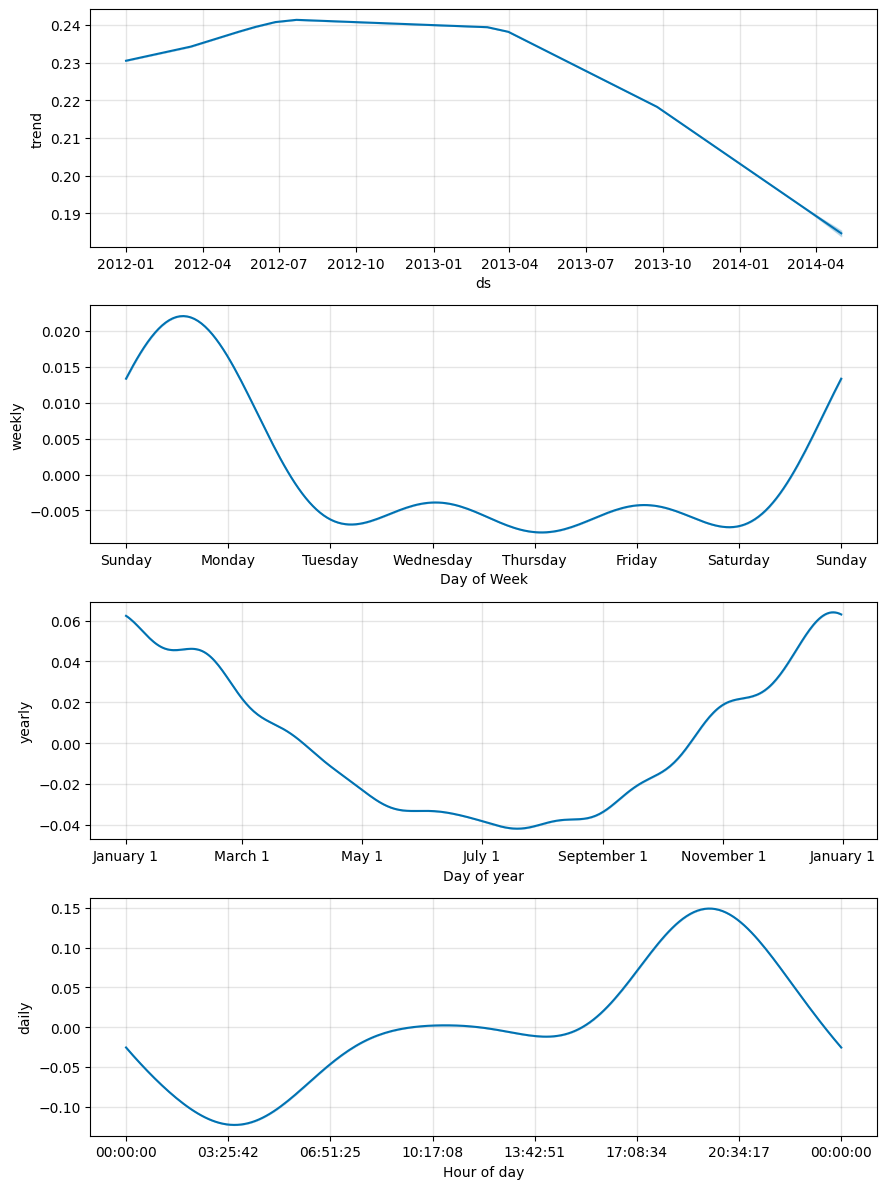

In [49]:
fig = m.plot_components(fcst)


# Cross-Validate

In [50]:

df_cv = cross_validation(m, initial='366 days', period='180 days', horizon = '90 days')


  0%|                                                                                                                                 | 0/2 [00:00<?, ?it/s]16:24:11 - cmdstanpy - INFO - Chain [1] start processing
16:24:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|████████████████████████████████████████████████████████████▌                                                            | 1/2 [00:13<00:13, 13.83s/it]16:24:25 - cmdstanpy - INFO - Chain [1] start processing
16:24:30 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:31<00:00, 15.93s/it]


In [51]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-06-03 00:30:00,0.166486,0.108097,0.222525,0.151342,2013-06-03
1,2013-06-03 01:00:00,0.147014,0.092075,0.206098,0.150542,2013-06-03
2,2013-06-03 01:30:00,0.129433,0.072175,0.189402,0.121030,2013-06-03
3,2013-06-03 02:00:00,0.114003,0.050380,0.169753,0.111636,2013-06-03
4,2013-06-03 02:30:00,0.101310,0.044916,0.158650,0.114406,2013-06-03
...,...,...,...,...,...,...
8635,2014-02-27 22:00:00,0.299154,0.248606,0.355146,0.343924,2013-11-30
8636,2014-02-27 22:30:00,0.273324,0.219504,0.331749,0.335663,2013-11-30
8637,2014-02-27 23:00:00,0.247844,0.193715,0.305257,0.269226,2013-11-30
8638,2014-02-27 23:30:00,0.223651,0.167299,0.281745,0.236664,2013-11-30


# Permorfance Metrics 

In [52]:
df_p = performance_metrics(df_cv)

In [53]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days 00:00:00,0.001469,0.038329,0.030140,0.165737,0.117587,0.152540,0.881944
1,9 days 00:30:00,0.001469,0.038329,0.030140,0.165711,0.117587,0.152529,0.881944
2,9 days 01:00:00,0.001471,0.038352,0.030191,0.166019,0.118263,0.152844,0.881944
3,9 days 01:30:00,0.001475,0.038400,0.030234,0.166328,0.118440,0.153075,0.880787
4,9 days 02:00:00,0.001480,0.038473,0.030307,0.167007,0.118785,0.153612,0.879630


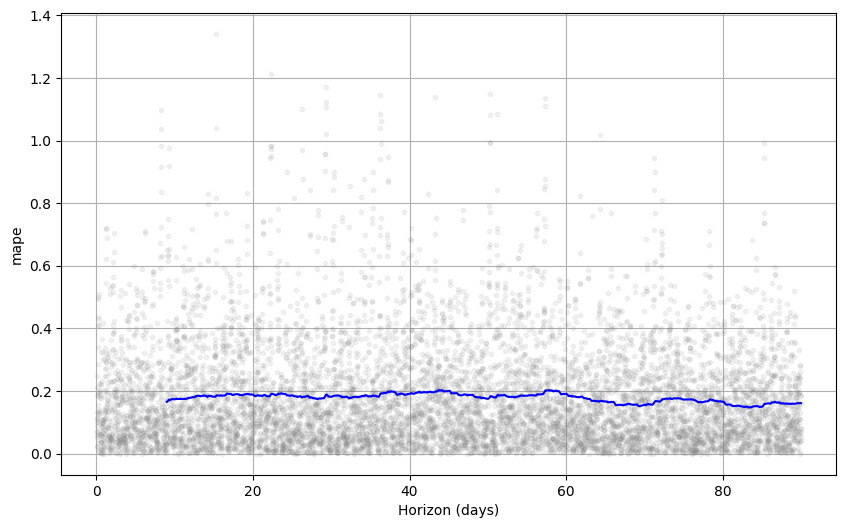

In [54]:
fig = plot_cross_validation_metric(df_cv, metric='mape')